In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt

import rose

plt.style.use('science')
gr = (1 + np.sqrt(5)) / 2
h = 3

In [2]:
energy = 50 # MeV
theta = np.array([200, -91.85])
training_points = np.array([
    [119.51219512195122, -14.634146341463415],
    [139.02439024390245, -4.878048780487805],
    [158.53658536585365, -48.78048780487805],
    [178.0487804878049, -117.07317073170732],
    [197.5609756097561, -131.70731707317074],
    [217.0731707317073, -126.82926829268293],
    [236.58536585365854, -82.92682926829268],
    [256.0975609756098, -175.609756097561],
    [275.609756097561, -19.51219512195122],
    [295.1219512195122, -170.73170731707316]
])

In [3]:
rbe = rose.ReducedBasisEmulator(
    rose.MN_Potential,
    training_points,
    energy,
    0
)

In [12]:
rbe.run_metrics('benchmark_data_MN_Potential_E_50.00_MeV.pkl', verbose=True, n_basis=5);

Wave function residuals (root of sum of squares):
50% and 95% quantiles
1.6329e+01  5.3538e+01
Phase shift residuals (relative difference):
50% and 95% quantiles
5.8540e-04  5.1736e-03
Maximum phase shift residuals
7.1538e-03


In [8]:
%%time
phi_emu = rbe.emulate_wave_function(theta)

CPU times: user 34.1 ms, sys: 19.4 ms, total: 53.4 ms
Wall time: 23.6 ms


In [9]:
%%time
phi_exact = rbe.se.phi(energy, theta, rbe.s_mesh, 0)

CPU times: user 116 ms, sys: 5.04 ms, total: 121 ms
Wall time: 120 ms


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


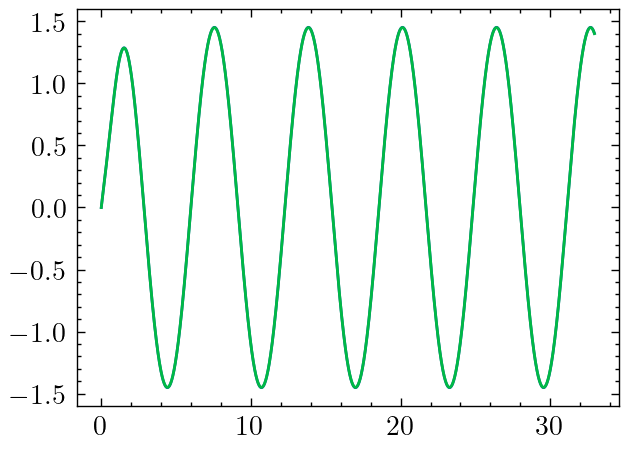

In [10]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')
ax.plot(rbe.s_mesh, phi_exact)
ax.plot(rbe.s_mesh, phi_emu);